In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
data_path = "/home/manish/Documents/ML practice/ML-Practice/data/USA_Housing.csv"

In [5]:
df = pd.read_csv(data_path)

In [6]:
df.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
y = df['Price']

In [9]:
y = np.array(y)
type(y)
y.shape

(5000,)

In [10]:
df.columns = ['income', 'age', 'rooms', 'bedrooms', 'population', 'price', 'address']

In [11]:
X = df[['income', 'age', 'rooms', 'bedrooms', 'population']]

In [12]:
X = np.array(X)
X.shape

(5000, 5)

In [13]:
print(X.shape)
print(y.shape)

(5000, 5)
(5000,)


In [14]:
X[0] # scaling of X is necessary

array([7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
       2.30868005e+04])

In [15]:
scaler_1 = StandardScaler()
normal_X_1 = scaler_1.fit_transform(X)
scaler_2 = MinMaxScaler()
normal_X_2 = scaler_2.fit_transform(X)

In [16]:
df1 = pd.DataFrame(normal_X_1)
print(df1.describe())
df2 = pd.DataFrame(normal_X_2)
print(df2.describe())
print(df.describe())

                  0             1             2             3             4
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03
mean  -3.552714e-17 -2.842171e-18 -4.206413e-16 -2.088996e-16 -3.240075e-16
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00
min   -4.765584e+00 -3.361975e+00 -3.730214e+00 -1.605598e+00 -3.626413e+00
25%   -6.664724e-01 -6.606490e-01 -6.846171e-01 -6.817833e-01 -6.810902e-01
50%    2.075434e-02 -6.852312e-03  1.502401e-02  5.564767e-02  3.616311e-03
75%    6.756386e-01  6.794590e-01  6.742146e-01  4.122077e-01  6.748621e-01
max    3.670725e+00  3.572745e+00  3.750297e+00  2.041039e+00  3.371219e+00
                 0            1            2            3            4
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean      0.564890     0.484803     0.498658     0.440296     0.518234
std       0.118547     0.144216     0.133694     0.274253     0.142920
min       0.000000     0.000000 

In [17]:
n = 5  # No. of features
m = 5000  # No. of training examples

In [18]:
w = np.zeros(shape = (5))  # weight matrix, shape = (n,1) or (n,)

In [19]:
print(type(w))
print(w.shape)
print(w)

<class 'numpy.ndarray'>
(5,)
[0. 0. 0. 0. 0.]


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(normal_X_1, y, test_size = 0.2, random_state = 42)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)

X_train: (4000, 5)
X_test: (1000, 5)
Y_train: (4000,)
Y_test: (1000,)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linear_obj = LinearRegression()

In [23]:
linear_obj.fit(X_train, Y_train)
linear_obj.coef_

array([230745.9407329 , 163243.2731459 , 120309.77397939,   3011.45976047,
       151552.63069253])

In [24]:
Y_predict = linear_obj.predict(X_test)

In [25]:
np.corrcoef(Y_test, Y_predict)

array([[1.        , 0.95812597],
       [0.95812597, 1.        ]])

In [26]:
X_train_transpose = np.transpose(X_train)
X_train_transpose.shape

(5, 4000)

In [27]:
def find_cost(X, y, w):
    y_predict = np.matmul(X,w)
    samples = len(y)
    sum = 0.0
    for i in range(samples):
        sum += (float(y_predict[i] - y[i])**2)/(2*samples)
    return sum

In [47]:
epochs = 1000
learning_rate = 1.5
w = np.zeros(shape = (5))  # weight matrix, shape = (n,1) or (n,)
cost = []

In [48]:
print('w:',w.shape)
print('X_train:',X_train.shape)
print('X_train_transp:',X_train_transpose.shape)
print('y:',Y_train.shape)

w: (5,)
X_train: (4000, 5)
X_train_transp: (5, 4000)
y: (4000,)


In [49]:
samples = len(X_train)
print(samples)

for i in range(epochs):
    tmp = np.matmul(X_train, w) - Y_train
    tmp = np.matmul(X_train_transpose, tmp)
    w = w - (learning_rate*tmp)/samples
    tmp_cost =  find_cost(X_train, Y_train, w)
    cost.append(tmp_cost)
#     print(tmp_cost)

4000


In [42]:
import matplotlib.pyplot as plt

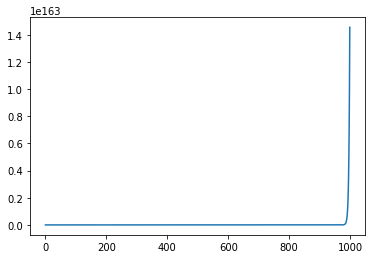

In [50]:
plt.plot(list(range(epochs)), cost)
plt.show()

In [104]:
y_final = np.matmul(X_test, w)


In [105]:
np.corrcoef(y_final, Y_test)

array([[1.       , 0.9569834],
       [0.9569834, 1.       ]])